# King County housing Dataset.

## Loading Data



Import neccessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

Create a function to read data:

In [2]:
def Read_csv(file_path):
    "Read .txt and .csv files"
    
    if '.csv' in file_path:
        data = pd.read_csv(file_path)
        
    else: 
        file = open(file_path, 'r')
        data = file.readlines()
        file.close()
    
    return data

In [3]:
data = Read_csv('/home/nick/Documents/Flatiron/Phase 2/Project_2/Data/Housing_data.csv')
meta_data = Read_csv('/home/nick/Documents/Flatiron/Phase 2/Project_2/Data/Description.txt')

## Data cleaning

In [4]:
meta_data

['# Column Names and descriptions for Kings County Data Set\n',
 '* **id** - unique identified for a house\n',
 '* **dateDate** - house was sold\n',
 '* **pricePrice** -  is prediction target\n',
 '* **bedroomsNumber** -  of Bedrooms/House\n',
 '* **bathroomsNumber** -  of bathrooms/bedrooms\n',
 '* **sqft_livingsquare** -  footage of the home\n',
 '* **sqft_lotsquare** -  footage of the lot\n',
 '* **floorsTotal** -  floors (levels) in house\n',
 '* **waterfront** - House which has a view to a waterfront\n',
 '* **view** - Has been viewed\n',
 '* **condition** - How good the condition is ( Overall )\n',
 '* **grade** - overall grade given to the housing unit, based on King County grading system\n',
 '* **sqft_above** - square footage of house apart from basement\n',
 '* **sqft_basement** - square footage of the basement\n',
 '* **yr_built** - Built Year\n',
 '* **yr_renovated** - Year when house was renovated\n',
 '* **zipcode** - zip\n',
 '* **lat** - Latitude coordinate\n',
 '* **lo

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
# Check duplicates
data.duplicated().sum() # None
# check nan values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront values are binary so we can set our Nan values to 0. For the others we are just going to drop the Nan values.

In [8]:
data['waterfront'].fillna(0, inplace=True)

In [9]:
# drop nan values 
data.dropna(axis=0, inplace=True)

In [10]:
data.shape

(17704, 21)

Change sqft_basement dtype because it should be numeric

In [11]:
data['sqft_basement'].value_counts()

0.0       10524
?           364
600.0       176
500.0       170
400.0       163
          ...  
3260.0        1
2250.0        1
602.0         1
1248.0        1
2810.0        1
Name: sqft_basement, Length: 285, dtype: int64

We can assume that the '?' values are unknown/Nan values and are the reason why dtype is set as object. 

Drop those values as they aren't helping.

In [12]:
data = data[data['sqft_basement'] != '?']

Now  we can convert to float type

In [13]:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [14]:
# Also yr_renovated should be int type
data['yr_renovated'] = data['yr_renovated'].astype(int)
# date to datetime type
data['date'] = data['date'].apply(pd.to_datetime)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17340 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17340 non-null  int64         
 1   date           17340 non-null  datetime64[ns]
 2   price          17340 non-null  float64       
 3   bedrooms       17340 non-null  int64         
 4   bathrooms      17340 non-null  float64       
 5   sqft_living    17340 non-null  int64         
 6   sqft_lot       17340 non-null  int64         
 7   floors         17340 non-null  float64       
 8   waterfront     17340 non-null  float64       
 9   view           17340 non-null  float64       
 10  condition      17340 non-null  int64         
 11  grade          17340 non-null  int64         
 12  sqft_above     17340 non-null  int64         
 13  sqft_basement  17340 non-null  float64       
 14  yr_built       17340 non-null  int64         
 15  yr_renovated   1734

Check which columns are have categorical variables

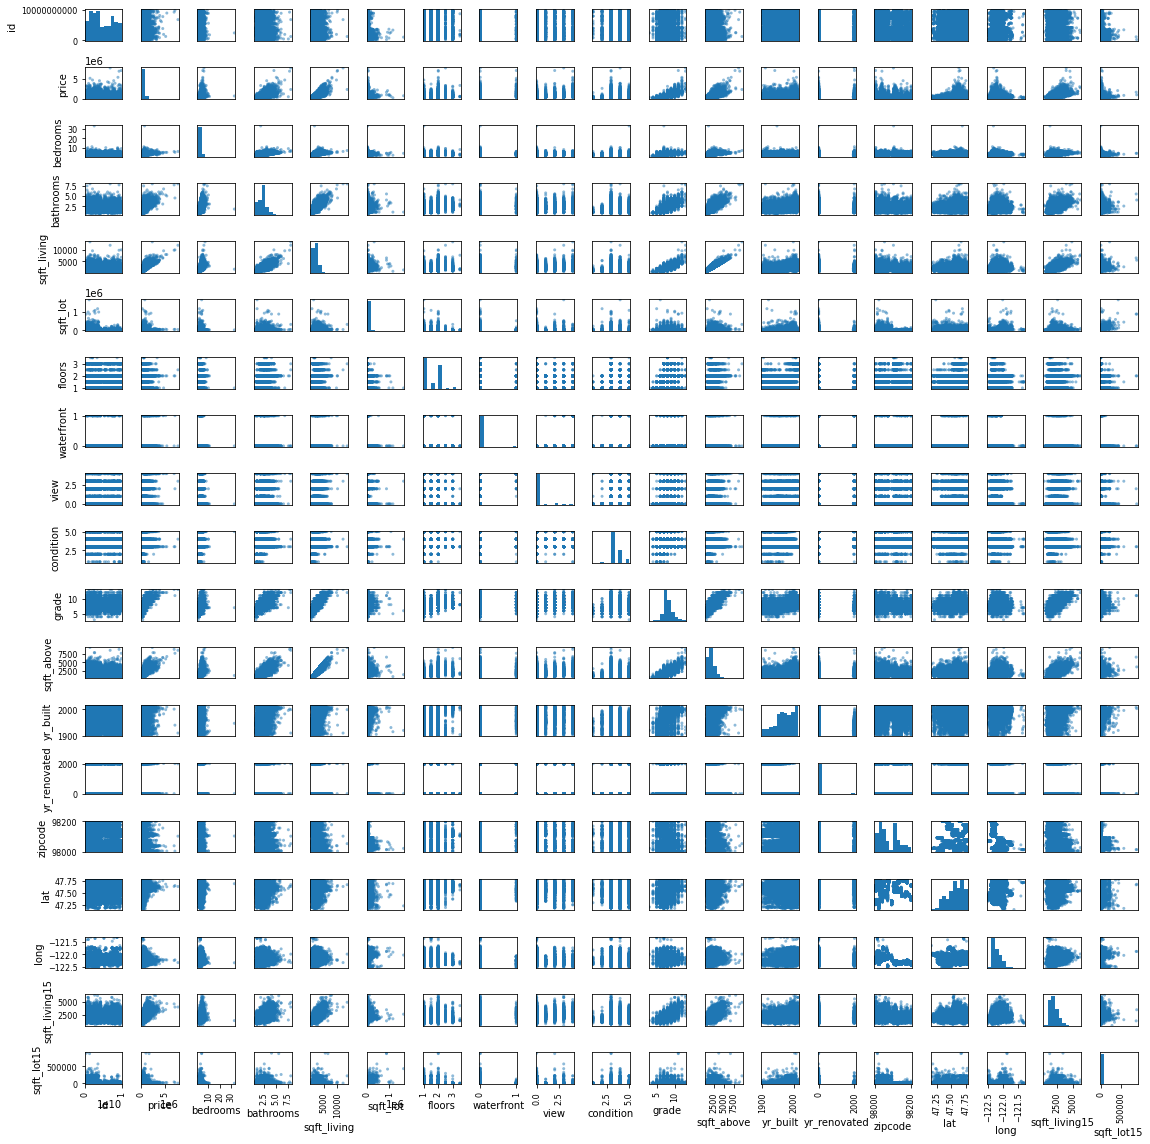

In [12]:
pd.plotting.scatter_matrix(data, figsize=(16, 16))
plt.tight_layout()
plt.savefig(
    '/home/nick/Documents/Flatiron/Phase 2/Project_2/Images/Columns_scatter_plots.png',
    transparent = True,
    facecolor ="w",
    orientation ='landscape'
           )

plt.show()

Seems like the categorical columns are: 
- bedooms
- floors
- waterfront
- view
- condition
- grade


In [16]:
# checking bedrooms column
data['bedrooms'].value_counts()

3     7871
4     5570
2     2190
5     1282
6      223
1      157
7       25
8       11
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Removing 33, because it is an outlier

In [17]:
data = data[data['bedrooms'] != 33]

In [18]:
# Checking floors column
data['floors'].value_counts()

1.0    8533
2.0    6672
1.5    1527
3.0     476
2.5     125
3.5       6
Name: floors, dtype: int64

I am going to use the floors of the floor values for consistency

In [19]:
data['floors'] = data['floors'].map(lambda x: x//1)

In [20]:
# Checking waterfront column
data['waterfront'].value_counts()

0.0    17223
1.0      116
Name: waterfront, dtype: int64

In [21]:
# Checking view column
data['view'].value_counts()

0.0    15648
2.0      770
3.0      393
1.0      274
4.0      254
Name: view, dtype: int64

In [22]:
# Checking condition column
data['condition'].value_counts()

3    11262
4     4530
5     1385
2      140
1       22
Name: condition, dtype: int64

In [23]:
# Checking grade column
data['grade'].value_counts()

7     7192
8     4869
9     2117
6     1642
10     914
11     320
5      184
12      71
4       18
13      11
3        1
Name: grade, dtype: int64

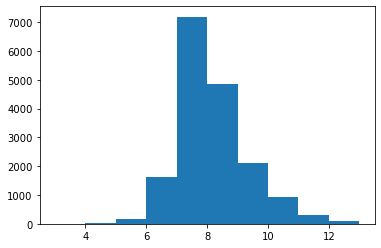

In [24]:
plt.hist(data['grade']);

In [25]:
# Checking the anomaly observed in yr_renovated
data['yr_renovated'].value_counts()

0       16617
2014       69
2013       31
2003       31
2007       30
        ...  
1950        1
1971        1
1948        1
1959        1
1934        1
Name: yr_renovated, Length: 69, dtype: int64

yr_renovated has 16960 records of 0 out of the total 17703. Due to this I'm going to drop the column.

In [26]:
data.drop('yr_renovated', inplace=True, axis=1)

## Export the cleaned Data

In [29]:
data.to_csv('/home/nick/Documents/Flatiron/Phase 2/Project_2/Data/Cleaned_housing.csv')

Initial cleaning is complete!!